In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore', category=UserWarning)


In [2]:
df1=pd.read_excel('data/emp-unemployment.xls')

In [3]:
df2=pd.read_excel('data/UnemploymentReport.xlsx')

In [4]:
df2.columns=df2.iloc[0] 

In [5]:
df2=df2.tail(-1) 

In [6]:
df2=df2.iloc[: , 1:]

In [7]:
df2['Median Household Income (2020)']=df2['Median Household Income (2020)'].str.lstrip('$')

In [8]:
df2['Median Household Income (2020)']=df2['Median Household Income (2020)'].str.replace(',','')

In [9]:
df2['Median Household Income (2020)']=df2['Median Household Income (2020)'].astype(float)

In [10]:
df2.columns = df2.columns.astype(str)

<AxesSubplot:xlabel='2020.0', ylabel='Median Household Income (2020)'>

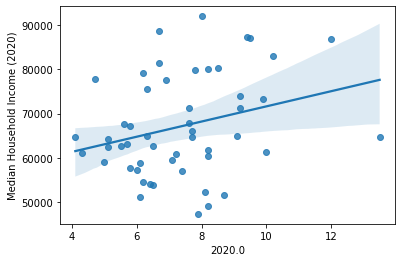

In [11]:
sns.regplot(x='2020.0',y='Median Household Income (2020)',data=df2)

In [12]:
df2=df2[['Name','2019.0', '2020.0', '2021.0']]

In [13]:
df=df1.merge(df2,left_on='Area',right_on='Name',how='left')

In [14]:
df=df.tail(-1) 
# df2.columns

In [15]:
df=df.drop(columns=['Name'])

In [16]:
df=df.rename({'2019.0':'2019','2020.0':'2020','2021.0':'2021'})

In [17]:
# Set the index to be the year column
df.set_index('Area', inplace=True)

In [18]:
# calculate the mean of each column
mean_row = df.mean(axis=0)

# append the mean row to the DataFrame
df = df.append(mean_row, ignore_index=True)

In [19]:
df

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2012,2013,2014,2015,2016,2017,2018,2019.0,2020.0,2021.0
0,8.900000,10.600000,14.100000,13.800000,11.000000,9.200000,9.700000,8.100000,7.200000,7.000000,...,8.000000,7.200000,6.800000,6.10000,5.80000,4.400000,3.900000,3.20000,6.500000,3.400000
1,9.600000,9.400000,9.900000,9.900000,9.800000,9.700000,10.900000,10.300000,8.800000,7.000000,...,7.100000,7.000000,6.900000,6.50000,6.90000,7.000000,6.600000,5.50000,8.200000,6.400000
2,6.600000,6.200000,10.100000,8.800000,5.200000,6.300000,6.900000,6.500000,6.400000,5.300000,...,8.300000,7.700000,6.800000,6.10000,5.40000,4.900000,4.800000,4.90000,7.700000,4.900000
3,7.600000,8.700000,9.900000,9.900000,8.700000,8.700000,8.600000,8.100000,7.600000,7.000000,...,7.600000,7.200000,6.000000,5.00000,4.00000,3.700000,3.700000,3.50000,6.100000,4.000000
4,6.800000,7.400000,10.000000,9.800000,7.800000,7.200000,6.700000,5.800000,5.300000,5.100000,...,10.400000,8.900000,7.500000,6.20000,5.50000,4.800000,4.200000,4.10000,10.200000,7.300000
5,5.800000,5.700000,7.300000,7.100000,5.400000,6.100000,7.500000,7.500000,6.500000,5.700000,...,7.900000,6.900000,5.000000,3.90000,3.20000,2.700000,3.300000,2.60000,6.900000,5.400000
6,5.800000,6.200000,6.900000,6.000000,4.700000,4.700000,3.800000,3.400000,3.000000,3.800000,...,8.300000,7.800000,6.600000,5.70000,5.10000,4.700000,4.100000,3.50000,7.800000,6.300000
7,7.600000,7.800000,8.400000,7.700000,6.300000,5.100000,4.300000,3.100000,3.100000,3.500000,...,7.200000,6.700000,5.700000,4.90000,4.50000,4.500000,3.800000,3.70000,7.600000,5.300000
8,7.400000,8.900000,10.400000,11.200000,9.100000,8.100000,7.500000,6.300000,5.000000,4.900000,...,9.000000,8.500000,7.800000,6.90000,6.10000,6.100000,5.600000,5.40000,8.000000,6.600000
9,6.100000,6.700000,8.400000,8.500000,6.400000,6.000000,5.800000,5.300000,5.100000,5.600000,...,8.500000,7.200000,6.300000,5.50000,4.80000,4.200000,3.600000,3.20000,8.200000,4.600000


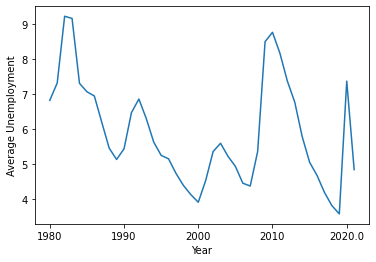

In [20]:
# create a line plot for the selected row
import matplotlib.pyplot as plt
df.loc[51].plot()
plt.xlabel('Year')
plt.ylabel('Average Unemployment')

# show the plot
plt.show()

In [21]:
from statsmodels.tsa.arima.model import ARIMA
# d=0 means ARMA mdoel
def ARIMA_model(country):
    state_data = df.loc[country]
    #Split the data into training and testing sets
    train_data = state_data.iloc[:int(len(state_data)*0.90)]
    test_data = state_data.iloc[int(len(state_data)*0.90):]
    # Fit the ARIMA model
    model = ARIMA(train_data, order=(2, 0, 5))
    model_fit = model.fit()
    # Make predictions on the testing set
    predictions = model_fit.forecast(steps=len(test_data))
    mse = mean_squared_error(test_data, predictions)
    return mse


In [22]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)


ARIMA_model(1)

1.1359635122483922

In [23]:
mse_values=[]
for i in range(52):
    mse_values.append(ARIMA_model(i))

In [24]:
average_mse_USA=sum(mse_values)/len(mse_values)

In [25]:
average_mse_USA

3.731299636152607